##### Projet CO2 par Polina, Vincent, Denis

Ce notebook:
entraine un modèle de classification pour prédiction

Prend en entrée les fichiers:
    (processed)/X_test_scaled.csv, X_train_scaled.csv, y_test_cat.csv, y_train_cat.csv : les données scalées et donc forcément préalablement séparées en jeux de train/test.

Fournit en sortie les fichiers:

     (models)/<nom_de_modele>.pkl


In [ ]:
# pour recharge automatique du/des modules communs
%load_ext autoreload
%autoreload 2

In [2]:
# charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
%run init_notebook.py

In [26]:
# Les fonctions utiles à plusieurs modèles
from common_co2 import load_our_data_cat, display_norm_matrix, display_roc

In [4]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "16"  # nombre de cœurs physiques réels


In [5]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data_cat()

# Classification par k-NN

In [7]:
# hyperparamètres du modèle 
# pour info, la 1ere fois on initialise avec 10 voisins. 
n_neighbors = 5

In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score

# Initialiser le modèle k-NN avec le k choisi
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Entraîner le modèle
knn_model.fit(X_train_scaled, y_train)

# Prédire les classes sur les données de test
y_pred = knn_model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle k-NN : {accuracy:.2f}")

# Afficher un rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Calcul et affichage du F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score : {f1:.2f}")

# Calcul et affichage du rappel (recall)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")


c:\Users\local\anaconda\envs\DST\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\local\anaconda\envs\DST\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\local\anaconda\envs\DST\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\local\anaconda\envs\DST\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~

Précision du modèle k-NN : 0.88
Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      2887
         2.0       0.77      0.71      0.74      1441
         3.0       0.86      0.88      0.87      6138
         4.0       0.84      0.85      0.84      5435
         5.0       0.88      0.87      0.88      5061
         6.0       0.91      0.89      0.90      2610
         7.0       0.94      0.94      0.94      1163

    accuracy                           0.88     24735
   macro avg       0.88      0.88      0.88     24735
weighted avg       0.88      0.88      0.88     24735

Matrice de confusion :
[[2883    2    1    0    1    0    0]
 [   4 1030  399    6    2    0    0]
 [   5  292 5383  451    7    0    0]
 [   5   11  452 4599  366    0    2]
 [   1    3   11  440 4409  183   14]
 [   1    0    1    3  223 2326   56]
 [   0    0    0    1    6   59 1097]]
F1-Score : 0.88
Recall : 0.88




Résultats pour k=5:
Précision du modèle k-NN : 0.88
Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      2887
         2.0       0.77      0.71      0.74      1441
         3.0       0.86      0.88      0.87      6138
         4.0       0.84      0.85      0.84      5435
         5.0       0.88      0.87      0.88      5061
         6.0       0.91      0.89      0.90      2610
         7.0       0.94      0.94      0.94      1163

    accuracy                           0.88     24735
   macro avg       0.88      0.88      0.88     24735
weighted avg       0.88      0.88      0.88     24735

Matrice de confusion :  
[[2883  2   1   0   1   0   0]  
 [   4 1030  399    6    2    0    0]  
 [   5  292 5383  451    7    0    0]  
 [   5   11  452 4599  366    0    2]  
 [   1    3   11  440 4409  183   14]  
 [   1    0    1    3  223 2326   56]  
 [   0    0    0    1    6   59 1097]]  
F1-Score : 0.88  
Recall : 0.88  
  
On observe que la classe 2 est la moins bien prédite, le modèle en place une bonne partie dans la classe 3  

Avec k=7 ce sont quasiment les mêmes chiffres.
Avec k=3 les résultats sont un peu moins bons.  
Avec k=4 ou 5, selon les classes, on peut considérer que les résultats sont meilleurs. k=5 donne le meilleur F1-score de 0.88

Sur le modèle de dispersion, on confirme ce qu'on voit dans le rapport de classification et la matrice de confusion:  
Le modèle sous-évalue la classe 2. Et il sur-évalue la classe 3, et dans une moindre mesure les classes 4 et 5.  

# Tentative d'amélioration par rééchantillonnage

On va essayer de diminuer la représentation de ces classes dans les données d'entraînement.  

In [8]:
import pandas as pd
from sklearn.utils import resample

# Convertir nos données X_train et y_train en DataFrame pour manipulation facile
data = pd.DataFrame(X_train_scaled)
data['y'] = y_train

# Classes à réduire
classes_a_diviser_par_3 = [3, 4]
classes_a_diviser_par_2_5 = [5]

# Liste pour stocker les sous-échantillons
sous_echantillons = []

for classe in data['y'].unique():
    data_classe = data[data['y'] == classe]
    
    if classe in classes_a_diviser_par_3:
        # Réduire le nombre d'échantillons de moitié
        data_classe = resample(data_classe, replace=False, n_samples=len(data_classe) // 3, random_state=42)

    elif classe in classes_a_diviser_par_2_5:
        # Réduire le nombre d'échantillons de 2,5
        data_classe = resample(data_classe, replace=False, n_samples=len(data_classe) // 2, random_state=42)
    
    sous_echantillons.append(data_classe)

# Combiner les sous-échantillons pour obtenir un jeu de données final
data_reduit = pd.concat(sous_echantillons)

# Séparer X_train_scaled et y_train après réduction
X_train_reduit = data_reduit.drop(columns=['y']).values
y_train_reduit = data_reduit['y'].values

print(f"Taille initiale du jeu d'entraînement : {len(y_train)}")
print(f"Taille du jeu d'entraînement après réduction : {len(y_train_reduit)}")


Taille initiale du jeu d'entraînement : 98939
Taille du jeu d'entraînement après réduction : 57817


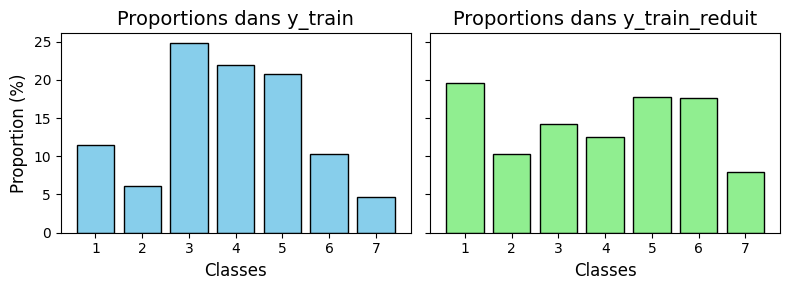

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul des proportions des classes dans y_train
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
proportions_train = counts_train / len(y_train) * 100  # En pourcentage

# Calcul des proportions des classes dans y_train_reduit
unique_classes_reduit, counts_reduit = np.unique(y_train_reduit, return_counts=True)
proportions_reduit = counts_reduit / len(y_train_reduit) * 100  # En pourcentage

# Création des bar graphs côte à côte
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Graphique pour y_train
axes[0].bar(unique_classes_train, proportions_train, color='skyblue', edgecolor='black')
axes[0].set_title("Proportions dans y_train", fontsize=14)
axes[0].set_xlabel("Classes", fontsize=12)
axes[0].set_ylabel("Proportion (%)", fontsize=12)
axes[0].set_xticks(unique_classes_train)

# Graphique pour y_train_reduit
axes[1].bar(unique_classes_reduit, proportions_reduit, color='lightgreen', edgecolor='black')
axes[1].set_title("Proportions dans y_train_reduit", fontsize=14)
axes[1].set_xlabel("Classes", fontsize=12)
axes[1].set_xticks(unique_classes_reduit)

# Ajustements et affichage
plt.tight_layout()
plt.show()


In [10]:
# on entraine notre modèle avec la version en classes égalisées de nos données
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score

# Initialiser le modèle k-NN avec le k choisi
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Entraîner le modèle
knn_model.fit(X_train_reduit, y_train_reduit)

# Prédire les classes sur les données de test
y_pred = knn_model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle k-NN : {accuracy:.2f}")

# Afficher un rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Calcul et affichage du F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score : {f1:.2f}")

# Calcul et affichage du rappel (recall)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")


c:\Users\local\anaconda\envs\DST\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Précision du modèle k-NN : 0.86
Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      2887
         2.0       0.65      0.86      0.74      1441
         3.0       0.87      0.80      0.83      6138
         4.0       0.81      0.81      0.81      5435
         5.0       0.86      0.85      0.85      5061
         6.0       0.87      0.90      0.89      2610
         7.0       0.94      0.93      0.94      1163

    accuracy                           0.86     24735
   macro avg       0.86      0.88      0.87     24735
weighted avg       0.86      0.86      0.86     24735

Matrice de confusion :
[[2883    3    0    0    0    1    0]
 [   4 1235  198    3    1    0    0]
 [   5  624 4887  612    9    1    0]
 [   5   20  503 4390  509    4    4]
 [   1    9   14  436 4321  263   17]
 [   1    0    1    1  206 2357   44]
 [   0    0    0    1    3   73 1086]]
F1-Score : 0.86
Recall : 0.86


Ce rééchantillonnage n'a pas amélioré les performances du modèle.

# Tentative d'omptimisation par rééchantillonnage SMOTE

Au final, c'est moins bien aves les tentatives de réchantillonnage.  

On va donc essayer d'utiliser SMOTE pour rééquilibrer les classes, plutot que diminuer le nombre d'échantillons dans les classes majoritaires.

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Rééchantillonner les données
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Vérifier les nouvelles proportions des classes
unique_classes, counts = np.unique(y_train_balanced, return_counts=True)
print("Distribution des classes après SMOTE :")
for classe, count in zip(unique_classes, counts):
    print(f"Classe {classe} : {count} échantillons")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul des proportions des classes dans y_train
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
proportions_train = counts_train / len(y_train) * 100  # En pourcentage

# Calcul des proportions des classes dans y_train_reduit
unique_classes_reduit, counts_reduit = np.unique(y_train_reduit, return_counts=True)
proportions_reduit = counts_reduit / len(y_train_reduit) * 100  # En pourcentage

# Calcul des proportions des classes dans y_train_balanced
unique_classes_balanced, counts_balanced = np.unique(y_train_balanced, return_counts=True)
proportions_balanced = counts_balanced / len(y_train_balanced) * 100  # En pourcentage

# Création des bar graphs côte à côte
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

# Graphique pour y_train
axes[0].bar(unique_classes_train, proportions_train, color='skyblue', edgecolor='black')
axes[0].set_title("Proportions dans y_train", fontsize=14)
axes[0].set_xlabel("Classes", fontsize=12)
axes[0].set_ylabel("Proportion (%)", fontsize=12)
axes[0].set_xticks(unique_classes_train)

# Graphique pour y_train_reduit
axes[1].bar(unique_classes_reduit, proportions_reduit, color='lightgreen', edgecolor='black')
axes[1].set_title("Proportions y_train_reduit", fontsize=14)
axes[1].set_xlabel("Classes", fontsize=12)
axes[1].set_xticks(unique_classes_reduit)

# Graphique pour y_train_balanced
axes[2].bar(unique_classes_balanced, proportions_balanced, color='coral', edgecolor='black')
axes[2].set_title("Proportions SMOTE y_.._balanced", fontsize=14)
axes[2].set_xlabel("Classes", fontsize=12)
axes[2].set_xticks(unique_classes_balanced)


# Ajustements et affichage
plt.tight_layout()
plt.show()


In [ ]:
# on entraine notre modèle avec la version en classes égalisées via SMOTE
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score

# Initialiser le modèle k-NN avec le k choisi
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Entraîner le modèle
knn_model.fit(X_train_balanced, y_train_balanced)

# Prédire les classes sur les données de test
y_pred = knn_model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle k-NN : {accuracy:.2f}")

# Afficher un rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Calcul et affichage du F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score : {f1:.2f}")

# Calcul et affichage du rappel (recall)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")


Après SMOTE également, le modèle k-NN n'est pas meilleur que l'original

# Tentative d'amélioration par pénalité

La classe 2 est sous représentée par rapport à la classe 3,  
on applique donc une pénalité aux probabilités

In [36]:
# paramètres pour ce chapitre:
threshold = 0.222 # par exemple 0.1 pour 10% de favorisation

In [ ]:
# Prédire les classes sur les données de test
y_prob = knn_model.predict_proba(X_test_scaled)

y_adjusted_pred = []

# Custom logic: on priorisera class 2 si c'est celle qui est la plus probable au threshold près
for prob in y_prob:
    # La classe avec la plus haute probe est:
    max_prob_class_index = np.argmax(prob)

    # Check if class 2 is close enough to the maximum probability
    if prob[1] >= prob[max_prob_class_index] - threshold:  # Quand suffisemment proche du max
        y_adjusted_pred.append(2)  # Favoriser la classe 2
    else:
        y_adjusted_pred.append(max_prob_class_index+1) 


In [28]:
# for info 
display(y_prob)
# k-NN with k=5 (our best results) is not very good for improvement by penalty,
# because the granularity of the probabilities is low.

array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0.6, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       ...,
       [0. , 0. , 0.2, ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.8, ..., 0. , 0. , 0. ]], shape=(24735, 7))

In [38]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Calculate new metrics
adjusted_accuracy = accuracy_score(y_test, y_adjusted_pred)
adjusted_f1 = f1_score(y_test, y_adjusted_pred, average='weighted')
adjusted_recall = recall_score(y_test, y_adjusted_pred, average='weighted')  # Include recall calculation

# Print the metrics
print(f"Adjusted Accuracy: {adjusted_accuracy:.2f}")
print(f"Adjusted F1-Score: {adjusted_f1:.2f}")
print(f"Adjusted Recall: {adjusted_recall:.2f}")


Adjusted Accuracy: 0.88
Adjusted F1-Score: 0.88
Adjusted Recall: 0.88


In [ ]:
# pour info, les lignes qui ont bougé avec la pénalisation

import pandas as pd

# DataFrame pour comparer les Series
comparison_df = pd.DataFrame({
    "Original Prediction": y_pred,
    "Adjusted Prediction": y_adjusted_pred
})

# Add a column to indicate differences
comparison_df["Difference"] = comparison_df["Original Prediction"] != comparison_df["Adjusted Prediction"]

# Display rows with differences
differences = comparison_df[comparison_df["Difference"]]
display(differences)


,Original Prediction,Adjusted Prediction,Difference


# Représentations graphiques des résultats pour le rapport

In [31]:
from os import name


model = knn_model
name = "k-NN"


🔹 Matrice de confusion pour k-NN and k=5🔹


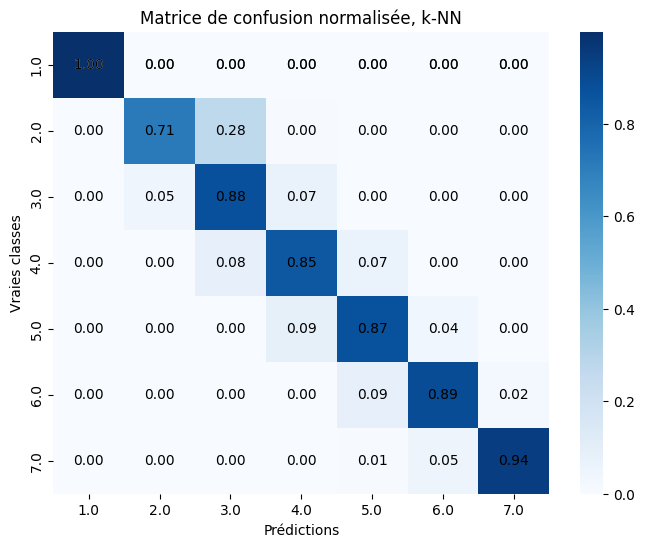

In [39]:
# Affichage de la matrice de confusion normalisée sans pénalité
display_norm_matrix(name, y_pred, y_test, "k=" + str(n_neighbors))


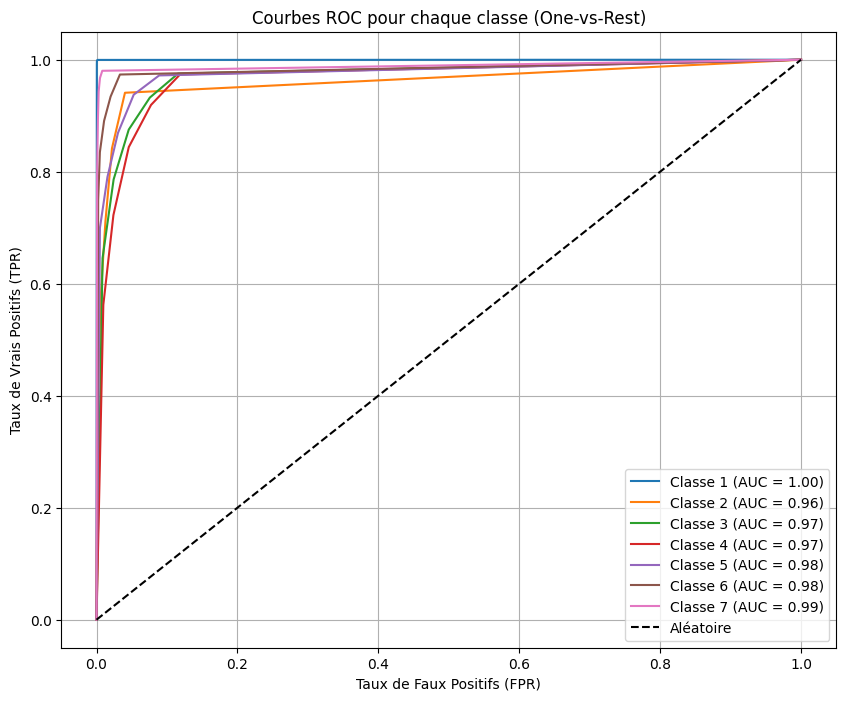

In [34]:
display_roc(X_test_scaled, y_test, y_pred, model)


🔹 Matrice de confusion pour k-NN adjusted and k=5🔹


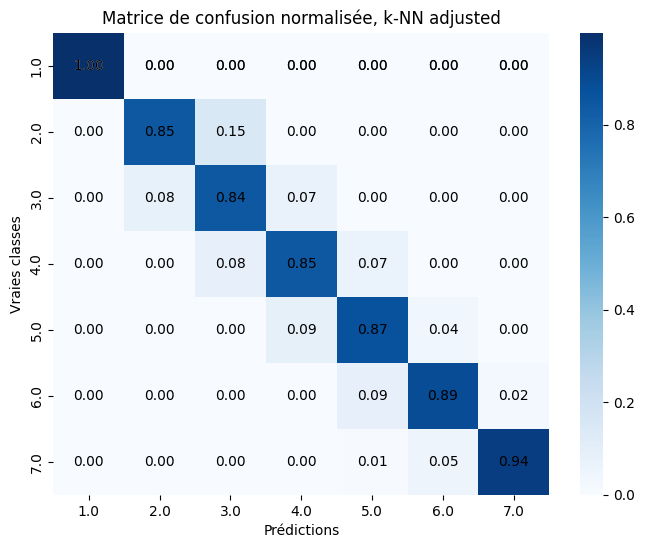

In [40]:
display_norm_matrix(name + " adjusted", y_adjusted_pred, y_test, "k=" + str(n_neighbors))

La classe 2 est améliorée, mais la classe 3 est legèrement dégradée.  
En conclusion les métriques F1-score, accuracy, recall sont quadi inchangées.

# Feature importance

Essayons de montrer les feature importances pour notre modèle k-NN.  
Pour un modèle k-NN qui ne procède pas par entraînement, nous pouvons appliquer la "permutation importance", c'est à dire observer les changements de prédictions induits pas des changements de variables.


In [23]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np


# Calcul de l'importance par permutation
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Visualisation
importances = result.importances_mean
indices = np.argsort(importances)[::-1]
features = X_test_scaled.columns  # Noms des variables

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importance moyenne (Permutation)")
plt.title("Importance des variables - k-NN")
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

# Sauvegarde du modèle

In [ ]:
import joblib

# Chemin pour enregistrer le modèle
model_path = base_models + 'knn_cat.pkl'

# Enregistrer le modèle
joblib.dump(knn_model, model_path)

print(f"Modèle k-NN enregistré dans {model_path}")
